In [1]:
import uproot
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#import seaborn as sns

import concurrent.futures, multiprocessing
ncpu = multiprocessing.cpu_count()
executor = concurrent.futures.ThreadPoolExecutor(ncpu*4)

%matplotlib inline

In [2]:
ret = _, _, _, _ 

In [3]:
#plt.set_cmap('plasma_r')
#plt.set_cmap('magma_r')
plt.set_cmap('inferno_r')
#plt.set_cmap('Reds')
#plt.set_cmap('PiYG')

In [4]:
#fname = "test/ntuple_preprocessed_combined2.root"
#fname = "test/scan3/ntuple_preprocessed_combined.root"
fname = "test/calo_scan/ntuple_preprocessed_combined.root"

tree = uproot.open(fname)["tree"]

In [5]:
tree.keys()

['run',
 'event',
 'rechit_x',
 'rechit_y',
 'rechit_channel',
 'rechit_energy',
 'rechit_skiroc',
 'rechit_layer',
 'ntracks',
 'nhits',
 'impact_x',
 'impact_y',
 '__index__']

In [6]:
cache = {}

In [7]:
df = tree.pandas.df(cache = cache,executor=executor)

In [8]:
df[:2]

,run,event,rechit_x,rechit_y,rechit_channel,rechit_energy,rechit_skiroc,rechit_layer,ntracks,nhits,impact_x,impact_y,__index__
0,1229,7,-1.948894,-1.12519,22,0.343264,0,1,1,1,-6.057332,-19.958084,6
1,1229,9,0.000010,-1.12519,34,0.535067,1,1,2,5,-5.278399,-20.209353,8


In [9]:
df.impact_x += 8.5
df.impact_y += 14

In [10]:
df["rechit_id"] = df.rechit_channel + 64*df.rechit_skiroc

In [11]:
len(df)

350866

In [12]:
select = df.impact_y < 10
#select &= df.ntracks == 1
#select &= df.nhits == 1
#select &= df.event < 100
select &= df.rechit_skiroc%2 == 0
select &= df.rechit_energy > 0.8


df = df[select]

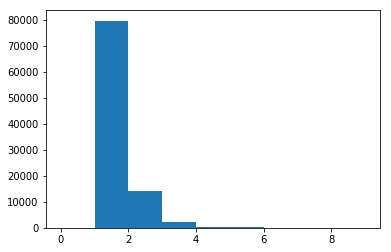

In [13]:
ret = plt.hist(df.nhits, bins = range(10))

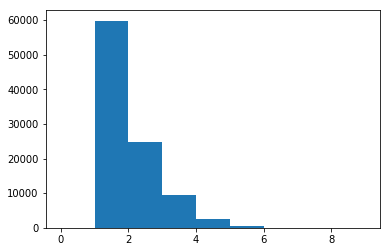

In [14]:
ret = plt.hist(df.ntracks, bins = range(10))

In [15]:
dfsel = df[df.event <100]

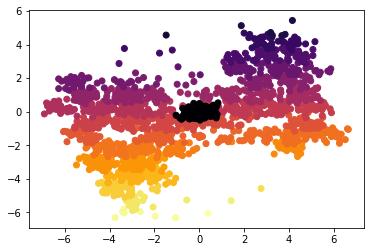

In [16]:
plt.scatter(dfsel.impact_x,dfsel.impact_y, c = dfsel.run, cmap='inferno_r')

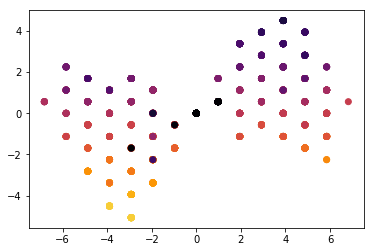

In [17]:
plt.scatter(df.rechit_x[df.event <100],df.rechit_y[df.event <100], c = df.run[df.event < 100])

In [18]:
df['delta_x'] = df.rechit_x - df.impact_x
df['delta_y'] = df.rechit_y - df.impact_y

In [19]:
df['delta_r'] = np.hypot(df.delta_x, df.delta_y)

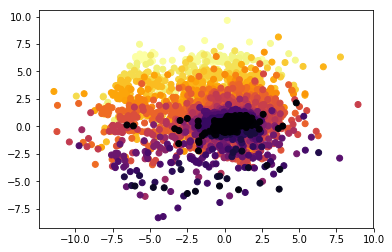

In [20]:
plt.scatter(df.delta_x,df.delta_y, c = df.run)

In [21]:
sele = df.delta_r < 2
sele &= abs(df.delta_x) < 1.5
sele &= abs(df.delta_y) < 1.
#sele &= df.nhits < 4
#sele &= df.ntracks == 1
#sele &= df.delta_r < 4

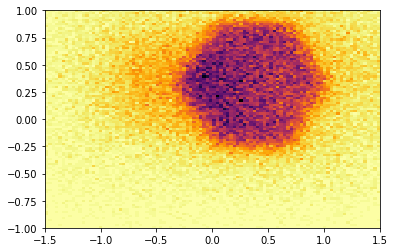

In [22]:
ret = plt.hist2d(df.delta_x[sele], df.delta_y[sele], 100)

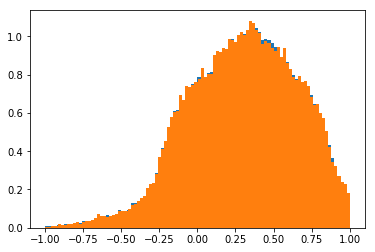

In [23]:
ret = plt.hist(df.delta_y[sele], 100, normed = True)
#ret = plt.hist(df.delta_y[sele & df.nhits == 1], 100, normed = True)
ret = plt.hist(df.delta_y[sele & (df.rechit_energy > 1)], 100, normed = True)

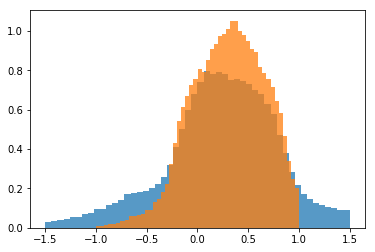

In [24]:
ret = plt.hist(df.delta_x[sele], 50, density=True, alpha=0.75)
ret = plt.hist(df.delta_y[sele], 50, density=True, alpha=0.75)

In [25]:
offx = df.delta_x[sele].mean()
offx

0.23342699765686195

In [26]:
offy = df.delta_y[sele].mean()
offy

0.2977718705750542

In [27]:
df.delta_x -= offx
df.delta_y -= offy

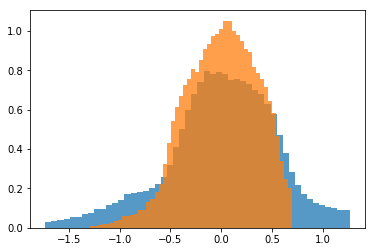

In [28]:
ret = plt.hist(df.delta_x[sele], 50, density=True, alpha=0.75)
ret = plt.hist(df.delta_y[sele], 50, density=True, alpha=0.75)

In [29]:
sele = df.delta_r < 2
sele &= abs(df.delta_x) < .4
sele &= abs(df.delta_y) < 0.9
#sele &= df.nhits < 4
#sele &= df.ntracks == 1
#sele &= df.delta_r < 4

In [30]:
#df.delta_y -= 2*0.27

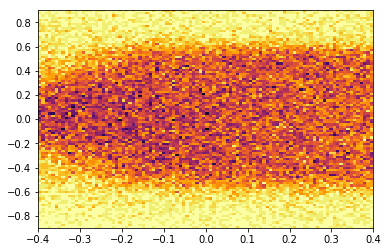

In [31]:
ret = plt.hist2d(df.delta_x[sele], df.delta_y[sele], 100)

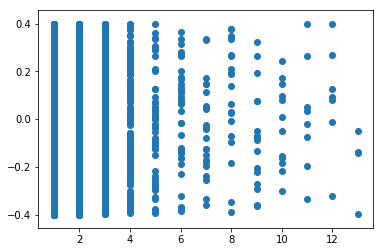

In [32]:
ret = plt.scatter(df.nhits[sele], df.delta_x[sele])

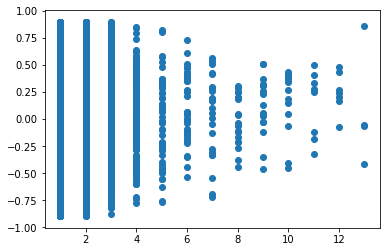

In [33]:
ret = plt.scatter(df.nhits[sele], df.delta_y[sele])

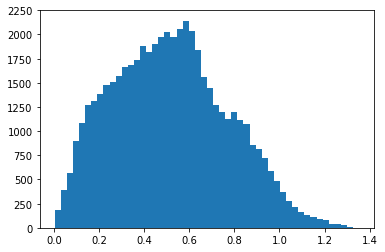

In [34]:
ret = plt.hist(df.delta_r[sele], 50)

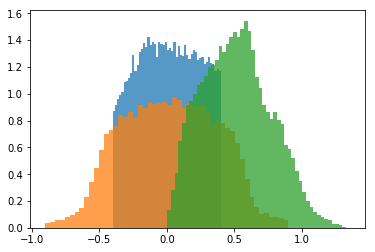

In [35]:
ret = plt.hist(df.delta_x[sele], 50, density=True, alpha=0.75)
ret = plt.hist(df.delta_y[sele], 50, density=True, alpha=0.75)
ret = plt.hist(df.delta_r[sele], 50, density=True, alpha=0.75)

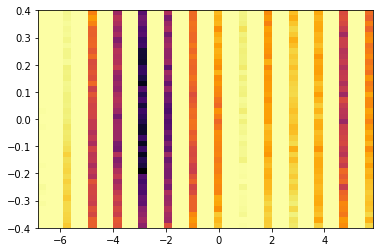

In [36]:
ret = plt.hist2d(df.rechit_x[sele], df.delta_x[sele], 40)

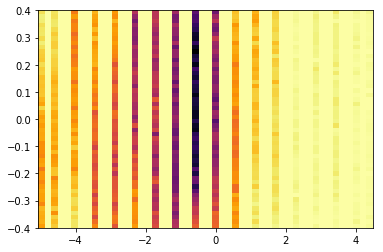

In [37]:
ret = plt.hist2d(df.rechit_y[sele], df.delta_x[sele], 50)

In [38]:
#sele &= df.rechit_skiroc == 0

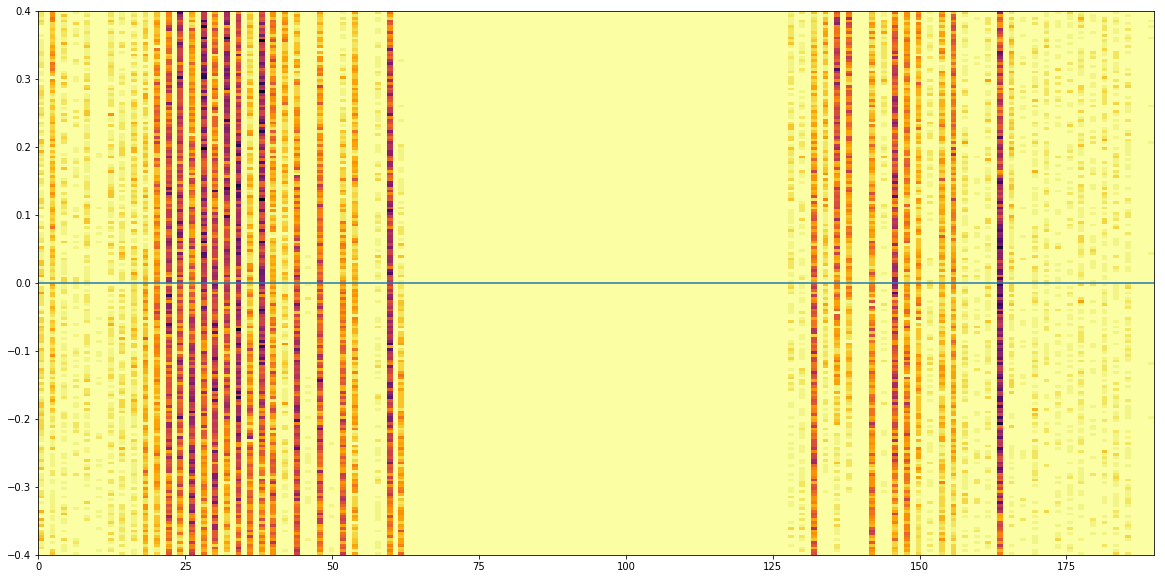

In [39]:
fig = plt.figure(figsize = (20,10))
ret = plt.hist2d(df.rechit_id[sele], df.delta_x[sele], 3*64)
ax = plt.gca()
ax.axhline(0)

In [40]:
#sele &= df.rechit_skiroc == 0

In [41]:
mean_dx = df.groupby('rechit_id')['delta_x'].mean()

In [42]:
mean_dy = df.groupby('rechit_id')['delta_y'].mean()

In [43]:
df = df[sele]

In [44]:
df["mean_dx"] = df.apply(lambda row: mean_dx[row.rechit_id], axis=1)

In [45]:
df["mean_dy"] = df.apply(lambda row: mean_dy[row.rechit_id], axis=1)

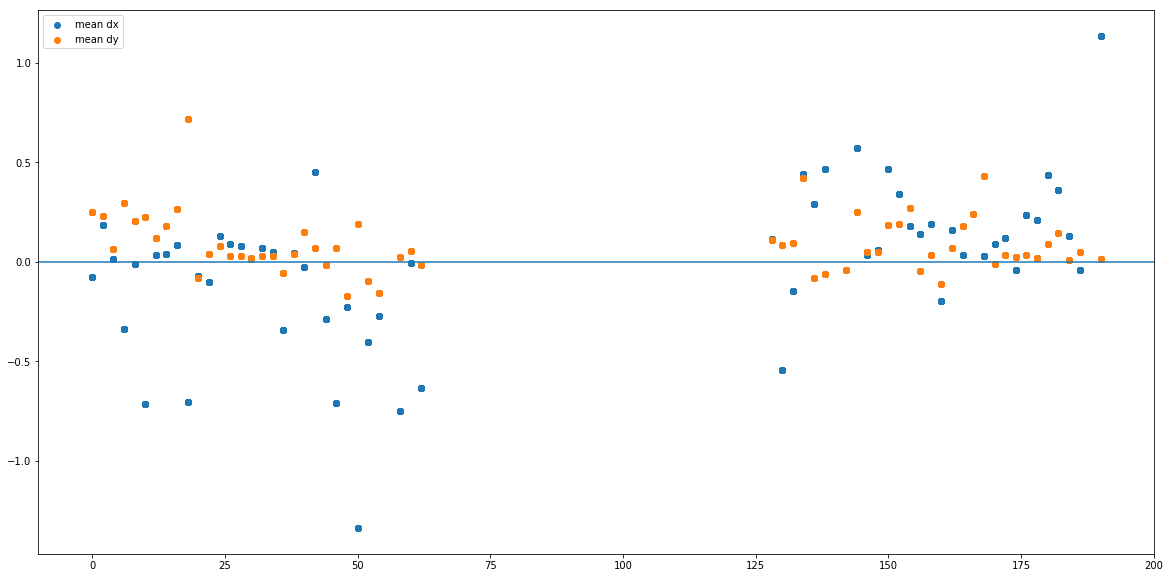

In [46]:
fig = plt.figure(figsize = (20,10))
ret = plt.scatter(df.rechit_id, df.mean_dx, label = 'mean dx')
ret = plt.scatter(df.rechit_id, df.mean_dy, label = 'mean dy')
ax = plt.gca()
ax.legend()
ax.axhline(0)

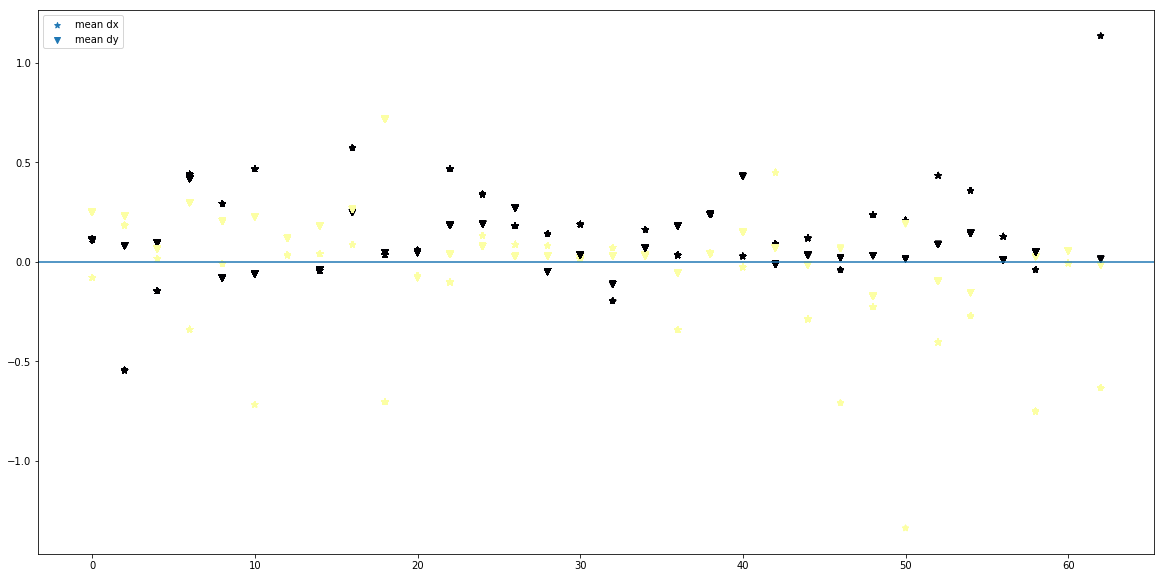

In [47]:
fig = plt.figure(figsize = (20,10))
ret = plt.scatter(df.rechit_channel, df.mean_dx, c = (df.rechit_skiroc+1)*100 , marker = '*', label = 'mean dx')
ret = plt.scatter(df.rechit_channel, df.mean_dy, c = (df.rechit_skiroc+1)*100 , marker = 'v', label = 'mean dy')
ax = plt.gca()
ax.legend()
ax.axhline(0)

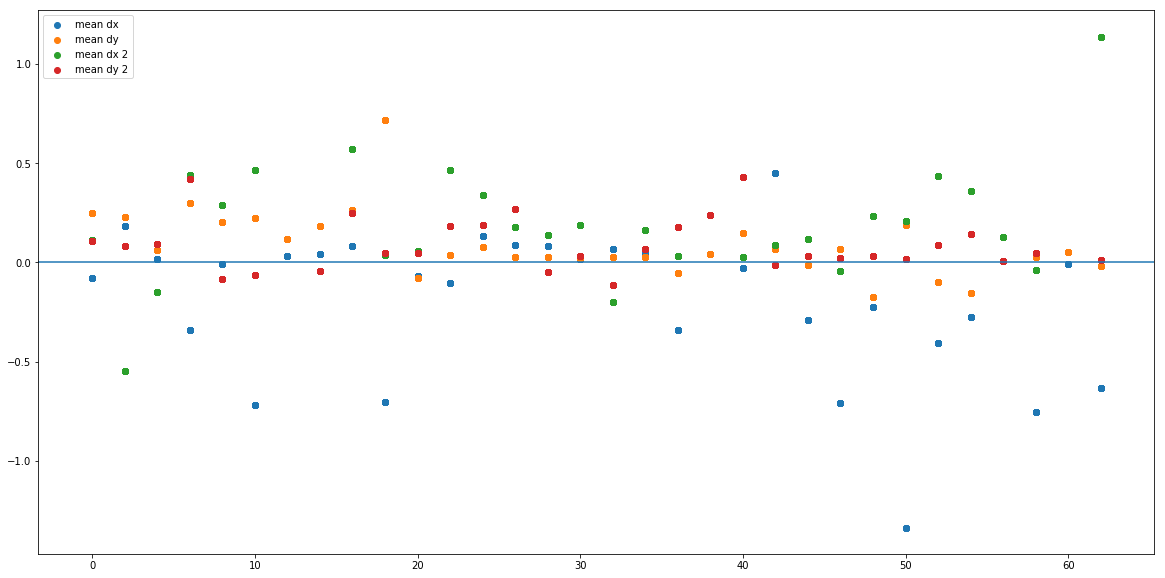

In [48]:
fig = plt.figure(figsize = (20,10))
dfsel = df[df.rechit_skiroc == 0]
ret = plt.scatter(dfsel.rechit_channel, dfsel.mean_dx, label = 'mean dx')
ret = plt.scatter(dfsel.rechit_channel, dfsel.mean_dy, label = 'mean dy')

dfsel = df[df.rechit_skiroc == 2]
ret = plt.scatter(dfsel.rechit_channel, dfsel.mean_dx, label = 'mean dx 2')
ret = plt.scatter(dfsel.rechit_channel, dfsel.mean_dy, label = 'mean dy 2')

ax = plt.gca()
ax.legend()
ax.axhline(0)

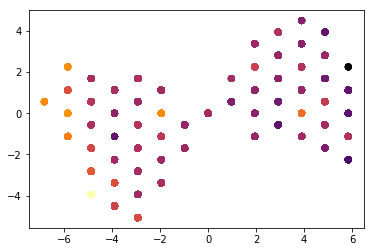

In [49]:
plt.scatter(df.rechit_x, df.rechit_y, c = df.mean_dx)

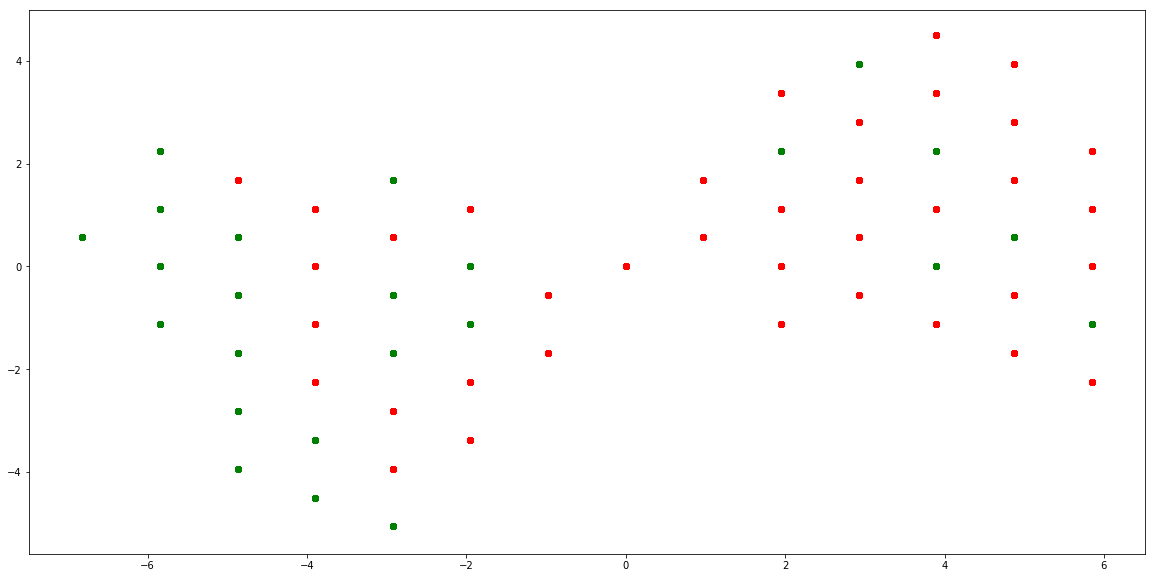

In [50]:
fig = plt.figure(figsize = (20,10))
#sele1 = sele & df.mean_dx[sele] > 0
#sele2 = sele & df.mean_dx[sele] < 0
sele1 = df.mean_dx > 0
sele2 = df.mean_dx < 0

#plt.scatter(df.rechit_x[sele], df.rechit_y[sele], c = 'b')
plt.scatter(df.rechit_x[sele1], df.rechit_y[sele1], c = 'r')
plt.scatter(df.rechit_x[sele2], df.rechit_y[sele2], c = 'g')

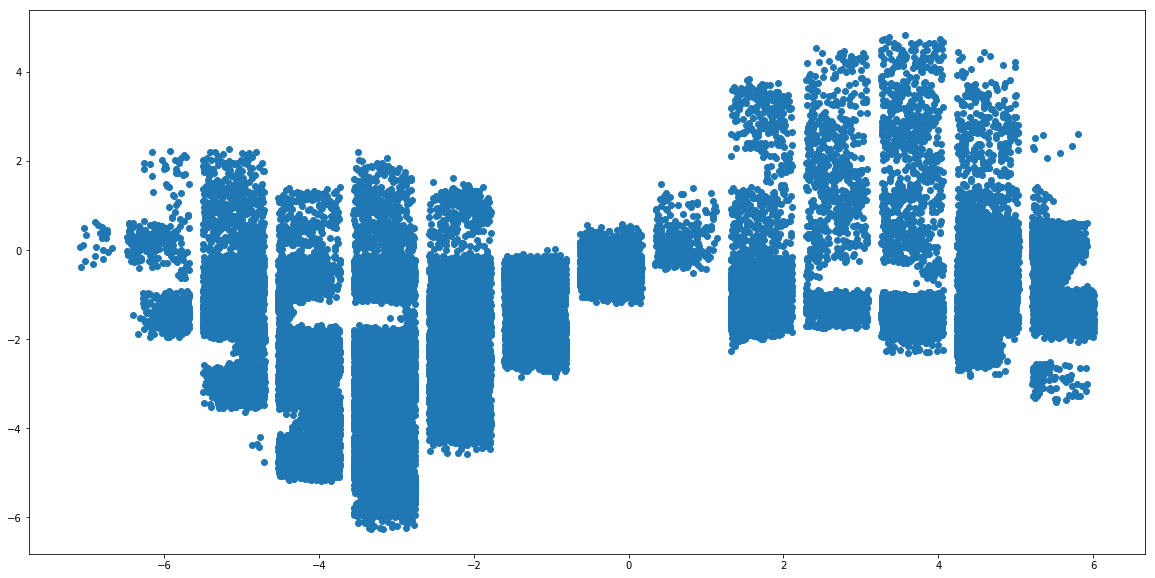

In [51]:
fig = plt.figure(figsize = (20,10))
sele1 = sele & (df.delta_x[sele] > 0.5) & (df.delta_x[sele] < 1.5)
sele2 = sele & (df.delta_x[sele] < -0.5) & (df.delta_x[sele] > -1.5)

plt.scatter(df.impact_x[sele], df.impact_y[sele])
plt.scatter(df.impact_x[sele1], df.impact_y[sele1])
plt.scatter(df.impact_x[sele2], df.impact_y[sele2])